# 可视化训练日志-训练过程总体评估指标

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [2]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
#!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
#!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


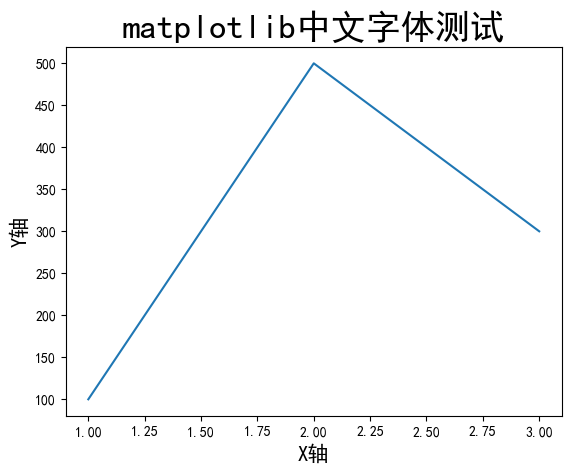

In [3]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [1]:
import os
os.chdir('mmsegmentation')

In [2]:
os.getcwd()

'd:\\desktop\\source\\MMSegmentation_young\\mmsegmentation'

## 导入工具包

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [4]:
# 日志文件路径
log_path = './work_dirs/ZihaoDataset-KNet/20251214_100130/vis_data/scalars.json'

In [5]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [6]:
len(json_list)

241

In [7]:
eval(json_list[4])

{'base_lr': 2.3999999999999953e-05,
 'lr': 2.3999999999999953e-05,
 'data_time': 0.005374979972839355,
 'grad_norm': 58.12028694152832,
 'loss': 1.3463215589523316,
 'decode.loss_ce.s0': 0.4791997402906418,
 'decode.acc_seg.s0': 71.85572052001953,
 'decode.loss_ce.s1': 0.2625615939497948,
 'decode.acc_seg.s1': 79.88907623291016,
 'decode.loss_ce.s2': 0.21667520552873612,
 'decode.acc_seg.s2': 87.74495697021484,
 'decode.loss_ce.s3': 0.22837782502174378,
 'decode.acc_seg.s3': 87.27497100830078,
 'aux.loss_ce': 0.15950718894600868,
 'aux.acc_seg': 58.02309036254883,
 'time': 0.2705514430999756,
 'iter': 400,
 'memory': 4611,
 'step': 400}

In [16]:
train_rows = []
test_rows = []

for each in json_list[:-1]:
    row = eval(each)
    if 'aAcc' in row:
        test_rows.append(row)
    else:
        train_rows.append(row)

df_train = pd.DataFrame(train_rows)
df_test = pd.DataFrame(test_rows)

In [ ]:
# for each in json_list[:-1]:
#     row = pd.DataFrame([eval(each)])  # 把字典转成单行 DataFrame
#     if 'aAcc' in each:
#         df_test = pd.concat([df_test, row], ignore_index=True)
#     else:
#         df_train = pd.concat([df_train, row], ignore_index=True)

NameError: name 'df_train' is not defined

In [17]:
df_train

,base_lr,lr,data_time,grad_norm,loss,decode.loss_ce.s0,decode.acc_seg.s0,decode.loss_ce.s1,decode.acc_seg.s1,decode.loss_ce.s2,decode.acc_seg.s2,decode.loss_ce.s3,decode.acc_seg.s3,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,7.200000e-07,7.200000e-07,0.005295,312.670064,3.437921,0.612029,33.551071,0.638375,67.909225,1.152523,44.953133,0.796434,39.645260,0.238561,27.859955,0.270849,12,6746,12
1,6.000000e-06,6.000000e-06,0.004988,200.474831,2.806853,0.627482,26.299185,0.589645,80.740242,0.692192,76.646774,0.656814,78.815773,0.240720,45.290215,0.269874,100,4611,100
2,1.200000e-05,1.200000e-05,0.005377,111.090386,1.925734,0.577935,63.701031,0.385562,50.726269,0.367344,58.575340,0.383862,65.797760,0.211030,50.051105,0.271259,200,4611,200
3,1.800000e-05,1.800000e-05,0.005783,127.068021,1.889877,0.618732,53.449249,0.333043,91.134644,0.354019,77.610016,0.363016,90.716553,0.221067,92.564392,0.278234,300,4611,300
4,2.400000e-05,2.400000e-05,0.005375,58.120287,1.346322,0.479200,71.855721,0.262562,79.889076,0.216675,87.744957,0.228378,87.274971,0.159507,58.023090,0.270551,400,4611,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,6.000000e-05,6.000000e-05,0.005280,1.955323,0.043829,0.009272,99.629211,0.009220,99.601746,0.009166,99.604034,0.009018,99.603271,0.007153,99.511719,0.272102,19600,4610,19600
197,6.000000e-05,6.000000e-05,0.005259,0.437158,0.030035,0.006650,99.684456,0.006429,99.700142,0.006375,99.701065,0.006367,99.703835,0.004214,99.658623,0.271250,19700,4610,19700
198,6.000000e-05,6.000000e-05,0.005183,33.701117,0.519473,0.059020,99.082993,0.181271,99.075539,0.134326,99.078522,0.117879,99.056152,0.026978,98.362808,0.272496,19800,4610,19800
199,6.000000e-05,6.000000e-05,0.005428,0.347072,0.031353,0.006664,99.669212,0.006482,99.671219,0.006519,99.667206,0.006505,99.661194,0.005184,99.470741,0.271442,19900,4610,19900


In [18]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,90.24,80.91,92.16,89.37,89.37,88.07,92.16,0.523158,0.734559,500
1,91.88,83.75,93.59,91.09,91.09,89.76,93.59,0.004999,0.051525,1000
2,91.50,82.70,91.65,90.44,90.44,89.53,91.65,0.004694,0.051288,1500
3,94.87,88.64,92.95,93.92,93.92,95.10,92.95,0.004807,0.052262,2000
4,94.88,88.76,93.37,94.00,94.00,94.70,93.37,0.008269,0.058419,2500
5,91.22,82.42,92.29,90.28,90.28,89.07,92.29,0.006400,0.054841,3000
6,95.86,90.75,94.21,95.12,95.12,96.19,94.21,0.005223,0.051184,3500
7,94.93,88.66,92.55,93.93,93.93,95.74,92.55,0.007562,0.054008,4000
8,96.26,91.66,95.06,95.62,95.62,96.25,95.06,0.004987,0.051292,4500
9,95.51,90.01,93.80,94.70,94.70,95.77,93.80,0.010689,0.059211,5000


## 导出训练日志表格

In [19]:
df_train.to_csv('图表/训练日志-训练集.csv', index=False)
df_test.to_csv('图表/训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [20]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [21]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

C:\Users\young\AppData\Local\Temp\ipykernel_916\4026232385.py:17: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')
C:\Users\young\AppData\Local\Temp\ipykernel_916\4026232385.py:17: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')
C:\Users\young\AppData\Local\Temp\ipykernel_916\4026232385.py:17: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')
C:\Users\young\AppData\Local\Temp\ipykernel_916\4026232385.py:17: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')
C:\Users\young\AppData\Local\Temp\ipykernel_916\4026232385.py:17: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-593

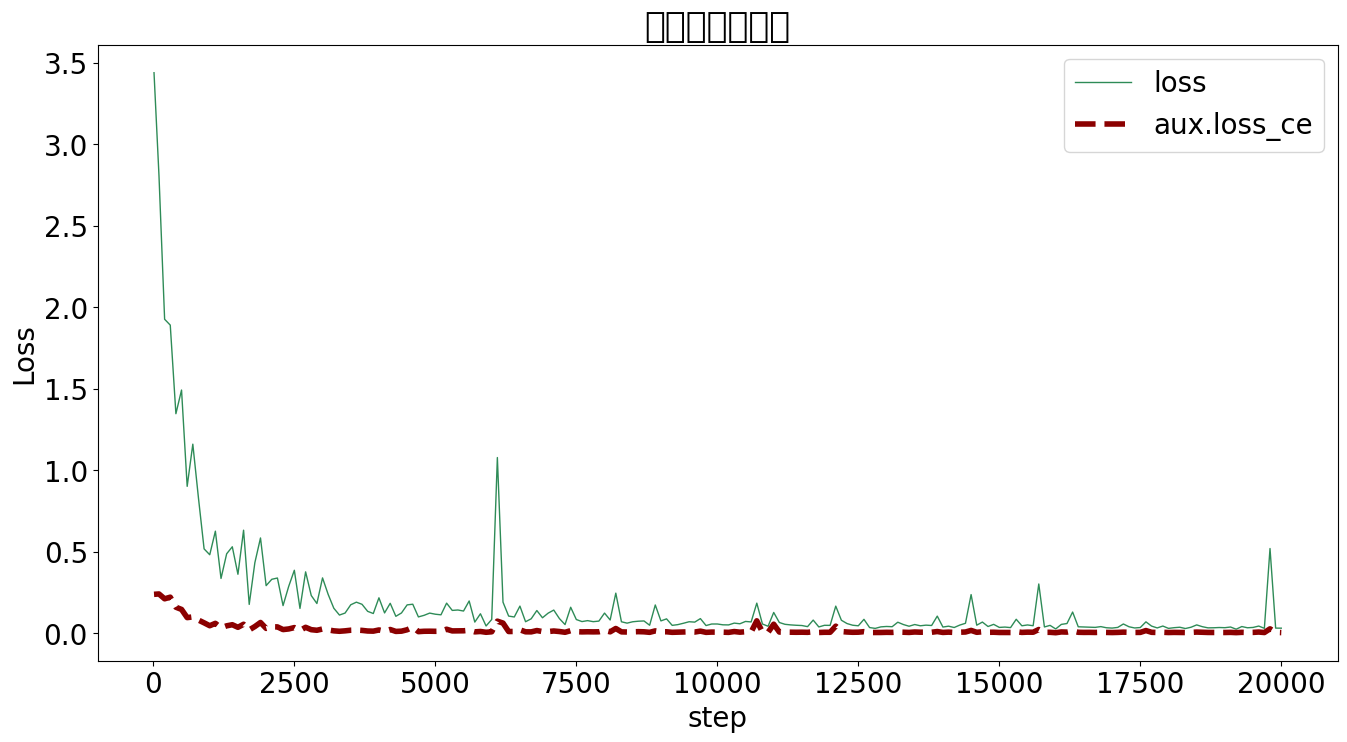

In [22]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 训练集准确率

In [21]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

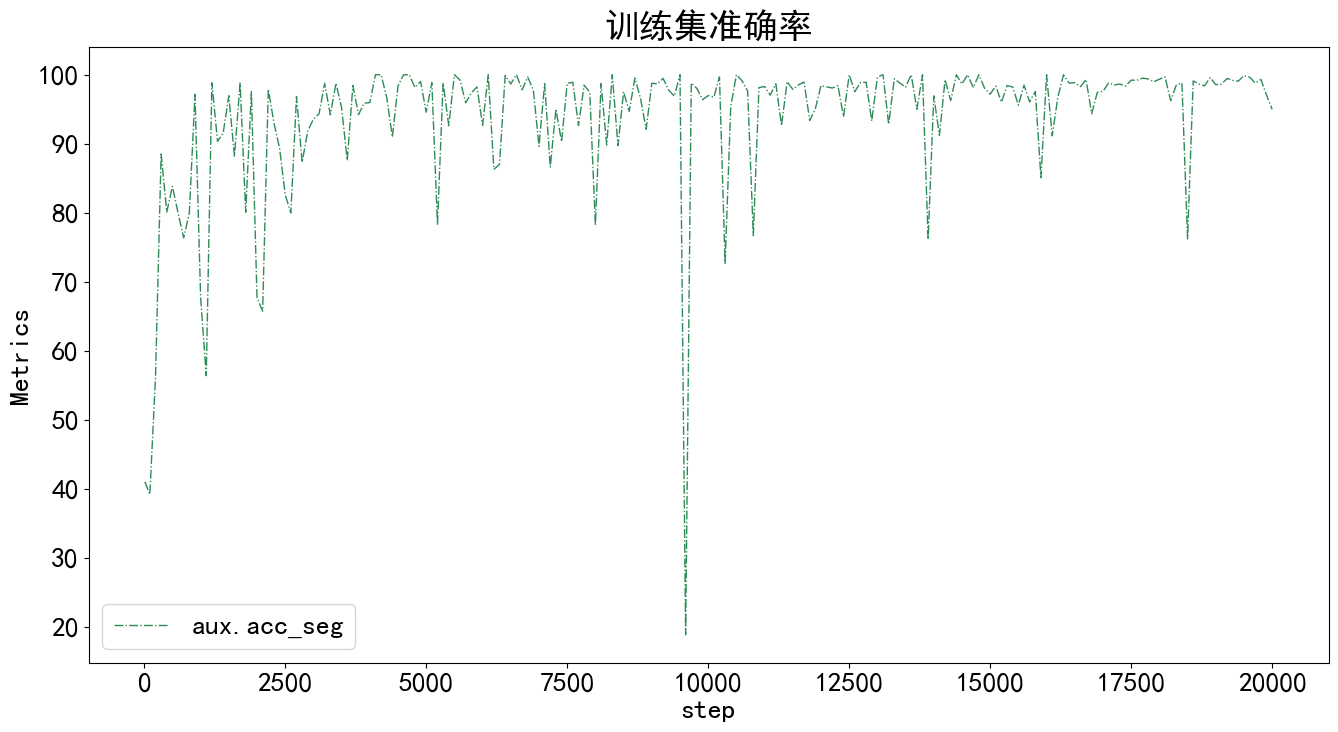

In [22]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [23]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall',
       'data_time', 'time', 'step'],
      dtype='object')

In [24]:
metrics = ['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall']

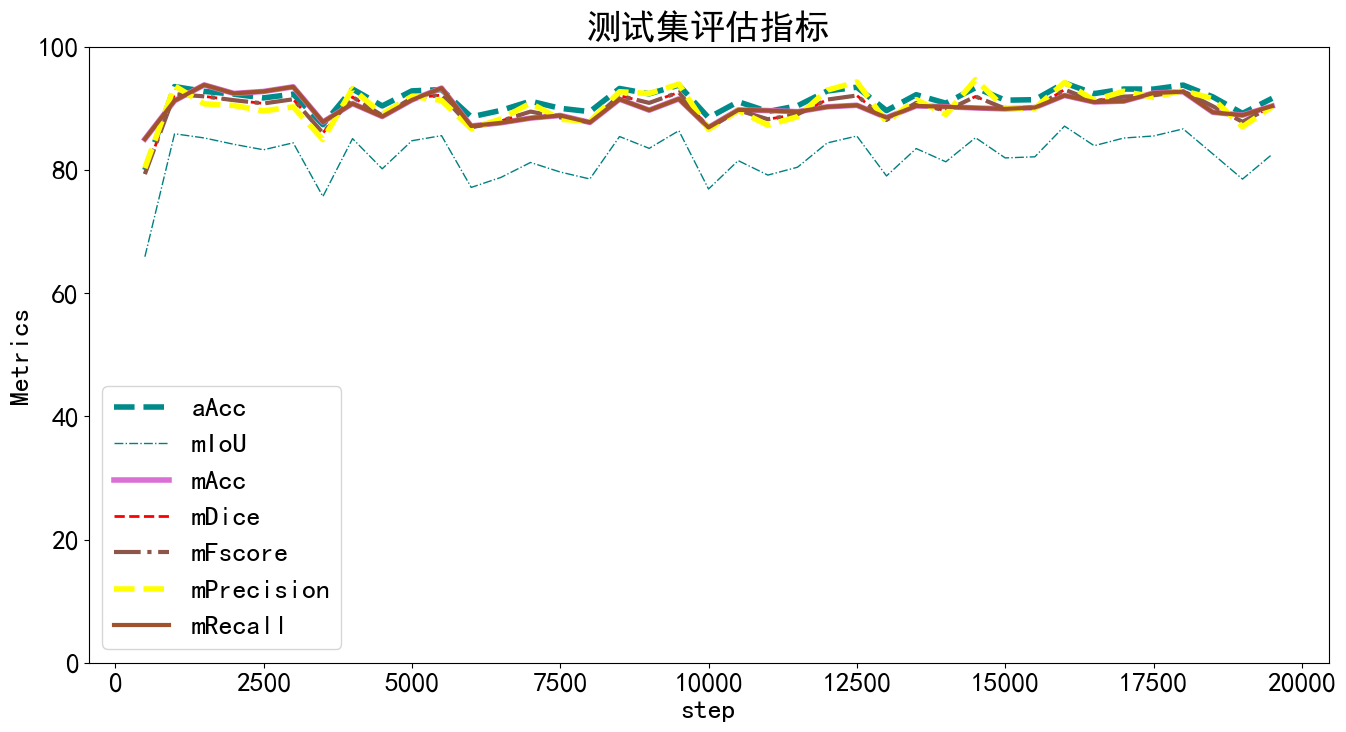

In [25]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.show()